<a href="https://colab.research.google.com/github/DamodaraBarbosa/linear_regression_studies/blob/main/Student_Predict_Grade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
sns.set()

# Carregando os dados em um dataframe

In [9]:
data = pd.read_csv('/content/drive/MyDrive/PracticingDataLinearRegression/student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Já é possível notar que a base de dados não contém dados faltantes.

In [11]:
f'A base de dados contém {data.shape[1]} colunas e {data.shape[0]} linhas'

'A base de dados contém 33 colunas e 395 linhas'

# Descrição dos dados

Retirada de: https://www.kaggle.com/datasets/dipam7/student-grade-prediction?datasetId=52721&sortBy=voteCount

Data Set Information:
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school-related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

Attribute Information:
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater 
than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - 
excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)


absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

# Análise exploratória das variáveis

## Coluna `school`

In [13]:
data['school'].unique()

array(['GP', 'MS'], dtype=object)

A base de dados contém informações de apenas duas escolas:
* GP - Gabriel Pereira;
* MS - Mousinha da Silveira.

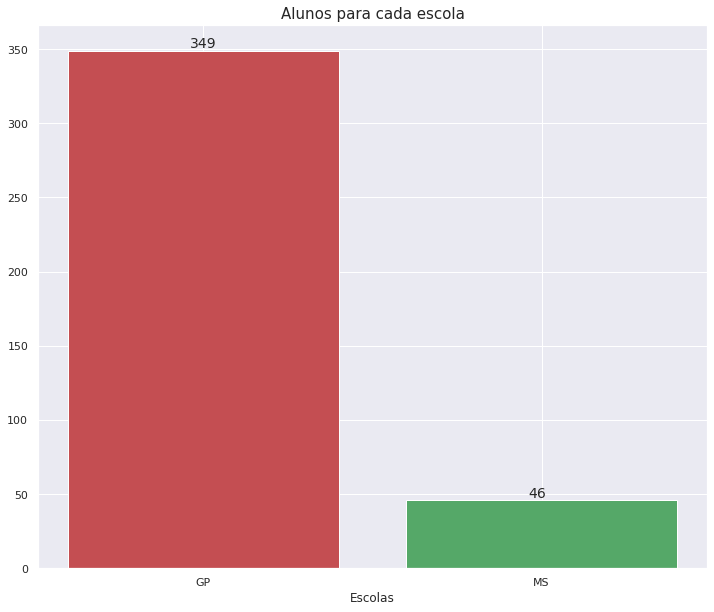

In [48]:
plt.figure(figsize= (12, 10))
bars = plt.bar(data['school'].value_counts().keys(), data['school'].value_counts().values, color= ['r', 'g'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 14)

plt.xlabel('Escolas')
plt.title('Alunos para cada escola', fontsize= 15)
plt.show()

## Coluna `sex` 

In [39]:
data['sex'].unique()

array(['F', 'M'], dtype=object)

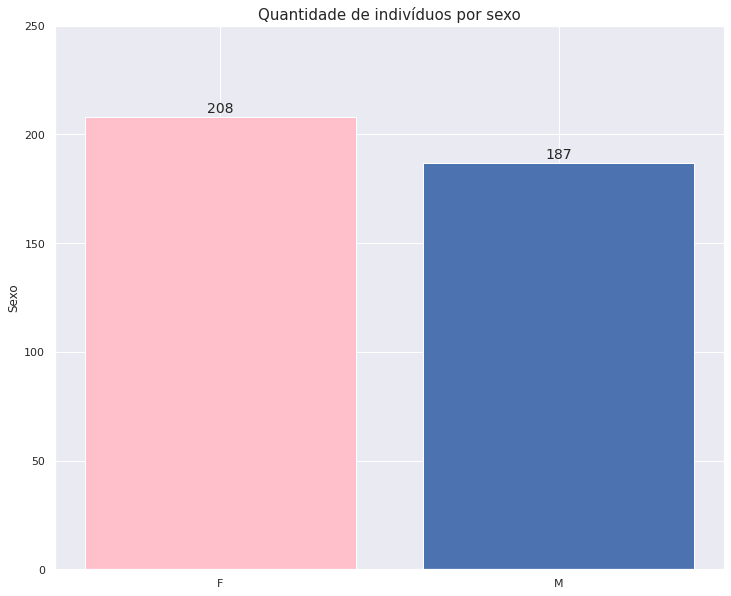

In [53]:
plt.figure(figsize= (12, 10))
bars = plt.bar(data['sex'].value_counts().keys(), data['sex'].value_counts().values, color= ['pink', 'b'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 14)

plt.ylim([0, 250]) # define o limite do eixo y do gráfico
plt.title('Quantidade de indivíduos por sexo', fontsize= 15)
plt.ylabel('Sexo')
plt.show()

## Coluna `age`

In [49]:
data['age'].unique()

array([18, 17, 15, 16, 19, 22, 20, 21])

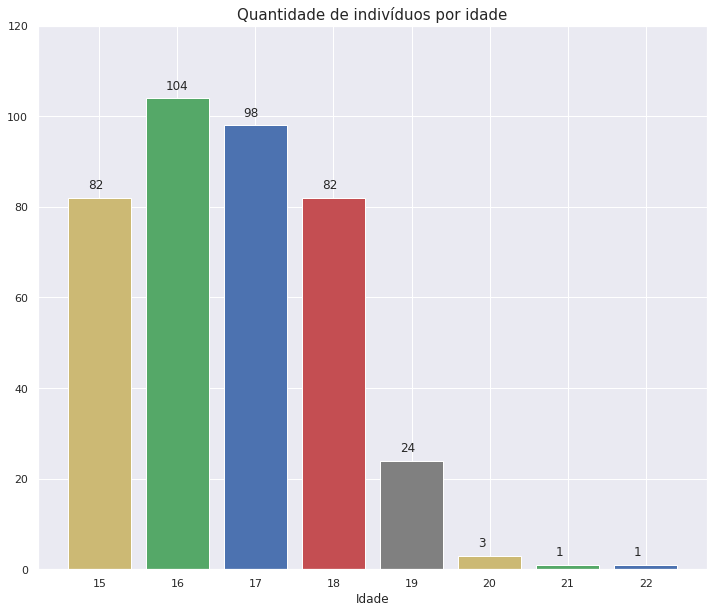

In [62]:
plt.figure(figsize= (12, 10))
bars = plt.bar(
    data['age'].value_counts().sort_index().keys(), 
    data['age'].value_counts().sort_index().values,
    color= ['y', 'g', 'b', 'r', 'gray']
)

for bar in bars:
  plt.text(bar.get_x() + 0.25, bar.get_height() + 2, bar.get_height(), fontsize= 12)

plt.ylim([0, 120])
plt.title('Quantidade de indivíduos por idade', fontsize= 15)
plt.xlabel('Idade')
plt.show()

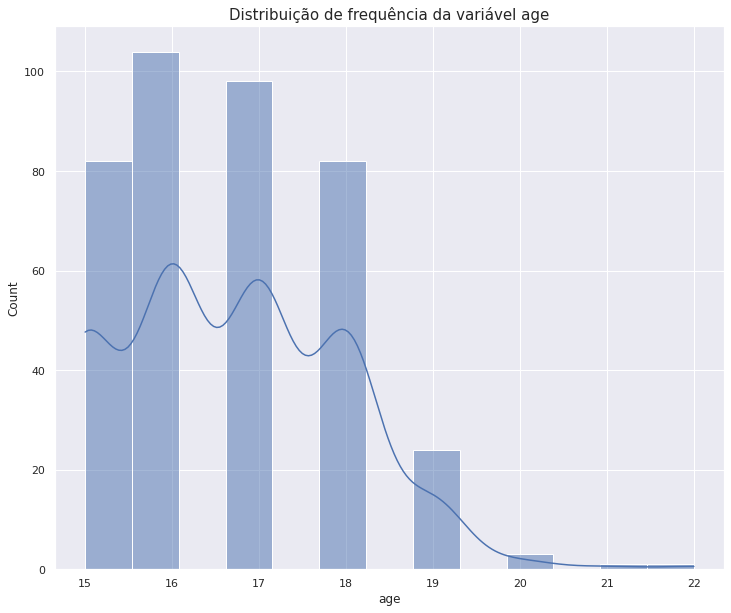

In [63]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(data= data, x= 'age', kde= True)
ax.set_title('Distribuição de frequência da variável age', fontsize= 15)
plt.show()

## Coluna `address`

In [65]:
data['address'].unique()

array(['U', 'R'], dtype=object)

A variável `address` contém apenas dois valores:
* U - para urbano;
* R - para rural.

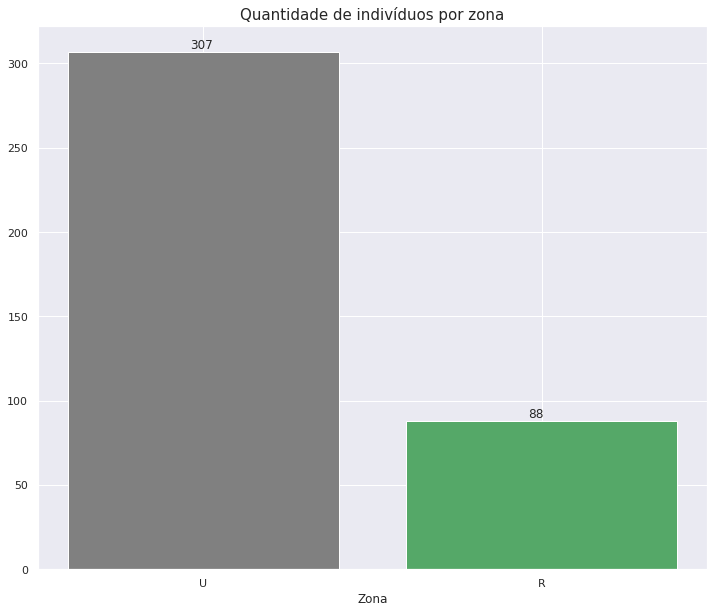

In [71]:
plt.figure(figsize= (12, 10))
bars = plt.bar(data['address'].value_counts().keys(), data['address'].value_counts().values, color= ['gray', 'g'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 12)

plt.title('Quantidade de indivíduos por zona', fontsize= 15)
plt.xlabel('Zona')
plt.show()

## Coluna `famsize`

In [72]:
data['famsize'].unique()

array(['GT3', 'LE3'], dtype=object)

A variável `famsize` contém dois tipos de dados:
* GT3 - maior do que 3 integrantes;
* LE3 - menor ou iguala 3 integrandes.

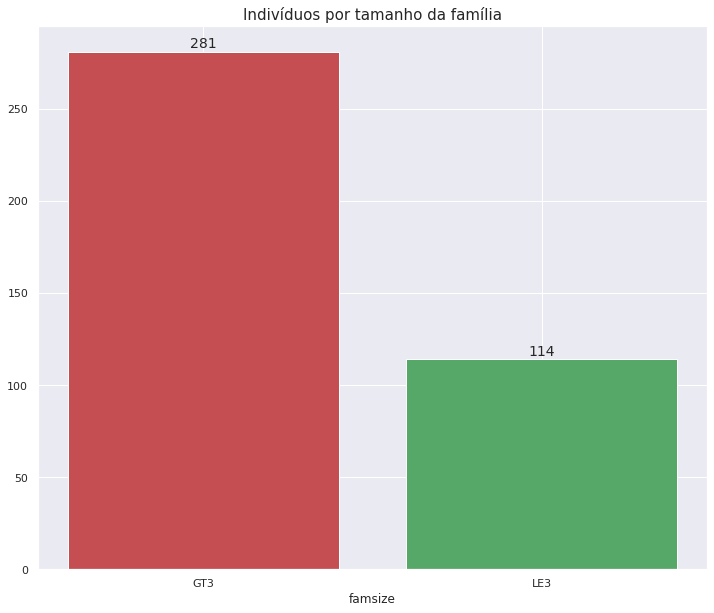

In [78]:
plt.figure(figsize= (12, 10))
bars = plt.bar(data['famsize'].value_counts().keys(), data['famsize'].value_counts().values, color= ['r', 'g'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 14)

plt.title('Indivíduos por tamanho da família', fontsize= 15)
plt.xlabel('famsize')
plt.show()

## Coluna `Pstatus`

Indica o *status* de relacionamento entre os pais do indivíduo.

In [74]:
data['Pstatus'].unique()

array(['A', 'T'], dtype=object)

Em que:
* A - *apart*, ou seja, separados;
* T - *living together*, ou seja, vivendo juntos.

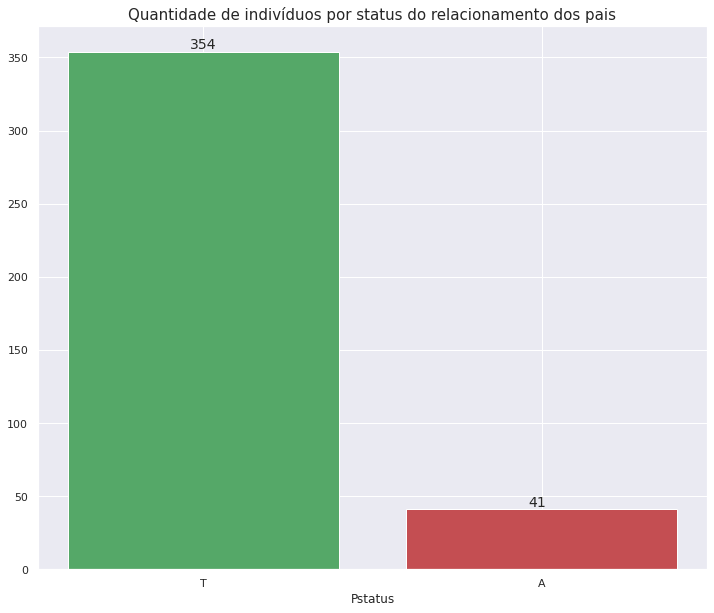

In [77]:
plt.figure(figsize= (12, 10))
bars = plt.bar(data['Pstatus'].value_counts().keys(), data['Pstatus'].value_counts().values, color= ['g', 'r'])

for bar in bars:
  plt.text(bar.get_x() + 0.36, bar.get_height() + 2, bar.get_height(), fontsize= 14)

plt.title('Quantidade de indivíduos por status do relacionamento dos pais', fontsize= 15)
plt.xlabel('Pstatus')
plt.show()

In [79]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Coluna `Medu`

Informa o grau de escolaridade da mãe do indivíduo.

In [81]:
data['Medu'].unique()

array([4, 1, 3, 2, 0])